In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
LEADERBOARD_FILE = "leaderboard_obl_phrases.csv"
SAVE_IMG = 'results/benchmarks.png'

In [2]:
leader = pd.read_csv(LEADERBOARD_FILE, sep=",", encoding="utf-8")
leader

,model,Precision pos class,Recall pos class,Precision,Recall,correct,incorrect,predicted yes,predicted no,comment
0,ChatGPT 3.5 tokenized sentences,0.541,0.492,[0. 0.532 0.541],[0. 0.578 0.492],535,465,455,543,NaN
1,ChatGPT 3.5 untokenized sentences,0.546,0.706,[0. 0.581 0.546],[0. 0.408 0.706],557,443,647,351,NaN
2,TartuNLP Grammatical Error Correction,0.537,0.526,[0.535 0.537],[0.546 0.526],536,464,490,510,untokenized sentences
3,EstRoberta model 1,0.615,0.064,[0.506 0.615],[0.96 0.064],512,488,52,948,e20b16lr3e6w000001 cp1183
4,EstRoberta model 2,0.634,0.142,[0.517 0.634],[0.918 0.142],530,470,112,888,e20b16lr7e6w0001_cp1001
5,NerTagger,0.607,0.130,[0.513 0.607],[0.916 0.13 ],523,477,107,893,(phrase is LOC or timex -> free)
6,EstBertNER_v2,0.628,0.142,[0.516 0.628],[0.916 0.142],529,471,113,887,(phrase is LOC or timex -> free)
7,Rule: time/loc lemma list,0.557,0.272,[0.519 0.557],[0.784 0.272],528,472,244,756,phrase or word in phrase is in time/loc lemma ...
8,Rule: verb oblcase v1,0.494,0.460,[0.494 0.494],[0.528 0.46 ],494,506,466,534,(default remove value 0)
9,Rule: verb oblcase v2,0.494,0.522,[0.494 0.494],[0.466 0.522],494,506,528,472,(default remove value 1)


In [3]:
precs = list(leader["Precision pos class"])
recs = list(leader["Recall pos class"])
labels = list(leader["model"])

<Figure size 3000x3500 with 0 Axes>

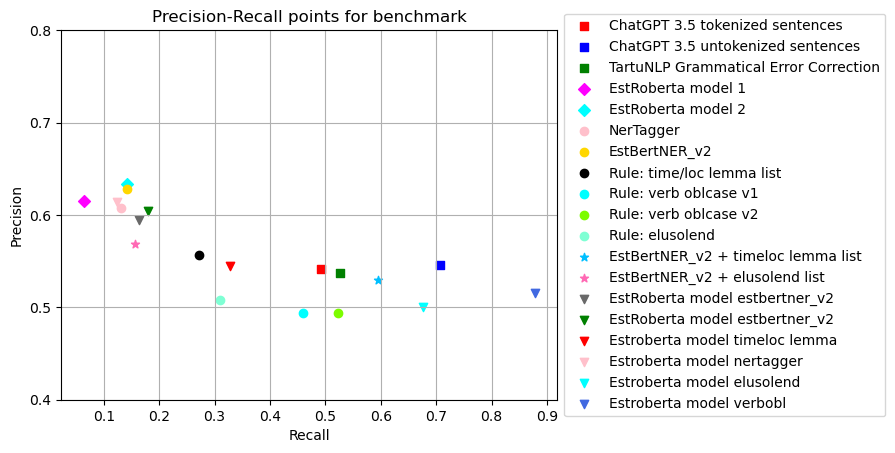

In [4]:
plt.figure(figsize=(30, 35))
fig, ax = plt.subplots()

# TODO: add colors if models are added
colors = ['red', 'blue', 'green', 'magenta', 'cyan', 'pink', 'gold', 'black', 'cyan', 'lawngreen', 'aquamarine', 'deepskyblue', 'hotpink', 'dimgrey', "green", "red", "pink" , "cyan" , "royalblue", "black", "black", "black", "black", "black"]


# Scatter plot with different marker colors
for i in range(len(precs)):
    if i<3: # gpt
        ax.scatter(recs[i], precs[i], color=colors[i], label=labels[i], marker='s')
    elif i>=3 and i<5: # esialgsel märgendusel treenitud bert
        ax.scatter(recs[i], precs[i], color=colors[i], label=labels[i], marker='D')
    elif i>=5 and i<11: # reeglipõhised
        ax.scatter(recs[i], precs[i], color=colors[i], label=labels[i], marker='o')
    elif i>=11 and i<13: # kombod
        ax.scatter(recs[i], precs[i], color=colors[i], label=labels[i], marker='*')
    elif i>=13: # reeglipõhise märgendamisega andmestikul treenitud bert
        ax.scatter(recs[i], precs[i], color=colors[i], label=labels[i], marker='v')

    # TODO:
    # if models are rearranged in the file then rearrange the marker correlations  


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall points for benchmark')
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8])
plt.grid(True)
plt.savefig(SAVE_IMG, bbox_inches='tight')
plt.show()